In [86]:
%run ./Code.ipynb

In [87]:
VERSION = 20
CLOUD_SINGLE = True
MIXUP = False
NO_BLACK_LOSS = False
DATA_SMALL = False
WEIGHTED = False

In [88]:
if 'train_md' not in globals() or 'test_md' not in globals():
    train_md, test_md = loadMetadata()

In [89]:
#path = PATH_WORK/'features/densenet161_v3/train/ID_000a935543'
#feats1 = pickle.load(open(path,'rb'))

In [90]:
#ff = pickle.load(open(PATH_WORK/'features/{}{}/{}/{}.f{}.a{}'\
#                .format(dataset_name,filename_add2,'train','train',0,0),'rb'))

In [91]:
#ff = pickle.load(open(PATH_WORK/'features/{}{}/{}/{}.f{}.a{}'\
#                .format(dataset_name,filename_add2,'test','test',0,0),'rb'))

In [92]:
#filename = PATH_WORK/'yuval'/\
#                'model_{}{}_version_classifier_splits_type_features_test_tta_split_{}.pkl'\
#                .format(dataset_name,filename_add,0)
#feats = pickle.load(open(filename,'rb'))

# Running

In [93]:
# ver 20, epoch 10, fold 1, train ll: 0.0293, val ll: 0.0631, ll_w: 0.0381, cor: 0.8384, auc: 0.9879, lr: 2e-06

# ver 19, epoch 9, fold 1, train ll: 0.0301, val ll: 0.0634, ll_w: 0.0387, cor: 0.8387, auc: 0.9876, lr: 2e-06

# ver 16, epoch 25, fold 0, train ll: 0.0289, val ll: 0.0640, ll_w: 0.0385, cor: 0.8418, auc: 0.9876, lr: 5e-06
#--- dataset 6 (3)
# ver 16, epoch 25, fold 0, train ll: 0.0302, val ll: 0.0650, ll_w: 0.0389, cor: 0.8381, auc: 0.9873, lr: 5e-06
# ver 16, epoch 25, fold 1, train ll: 0.0292, val ll: 0.0631, ll_w: 0.0380, cor: 0.8398, auc: 0.9877, lr: 5e-06
# ver 16, epoch 25, fold 2, train ll: 0.0299, val ll: 0.0615, ll_w: 0.0391, cor: 0.8407, auc: 0.9889, lr: 5e-06

#--- dataset 6 (3)
# mean aug on 2
# ver 15, epoch 25, fold 1, train ll: 0.0289, val ll: 0.0635, ll_w: 0.0384, cor: 0.8391, auc: 0.9874, lr: 5e-06
# offset=0
# ver 14, epoch 25, fold 1, train ll: 0.0291, val ll: 0.0633, ll_w: 0.0383, cor: 0.8392, auc: 0.9876, lr: 5e-06
# +MIXUP
# ver 13, epoch 50, fold 1, train ll: 0.0514, val ll: 0.0643, ll_w: 0.0385, cor: 0.8374, auc: 0.9873, lr: 5e-06
# mean aug
# ver 13, epoch 25, fold 1, train ll: 0.0286, val ll: 0.0636, ll_w: 0.0385, cor: 0.8389, auc: 0.9872, lr: 5e-06
# MIXUP
# ver 12, epoch 50, fold 1, train ll: 0.0509, val ll: 0.0631, ll_w: 0.0378, cor: 0.8398, auc: 0.9879, lr: 5e-06
# 2 more layers
# ver 11, epoch 25, fold 1, train ll: 0.0292, val ll: 0.0631, ll_w: 0.0380, cor: 0.8398, auc: 0.9877, lr: 5e-06
# more densenet arch
# ver 10, epoch 25, fold 1, train ll: 0.0298, val ll: 0.0631, ll_w: 0.0381, cor: 0.8398, auc: 0.9878, lr: 5e-06


#--- dataset 7 (5)
#ver 7, epoch 10, fold 0, train ll: 0.0296, val ll: 0.0648, ll_w: 0.0389, cor: 0.8395, auc: 0.9873, lr: 1e-05
#ver 7, epoch 10, fold 1, train ll: 0.0302, val ll: 0.0635, ll_w: 0.0388, cor: 0.8381, auc: 0.9876, lr: 1e-05
#ver 7, epoch 10, fold 2, train ll: 0.0302, val ll: 0.0608, ll_w: 0.0382, cor: 0.8418, auc: 0.9890, lr: 1e-05

#--- dataset 6 (3)
# ver 5, epoch 12, fold 1, train ll: 0.0303, val ll: 0.0633, ll_w: 0.0381, cor: 0.8395, auc: 0.9876, lr: 5e-06
# ver 7, epoch 12, fold 1, train ll: 0.0299, val ll: 0.0635, ll_w: 0.0385, cor: 0.8380, auc: 0.9876, lr: 5e-06
# ver 7, epoch 10, fold 0, train ll: 0.0309, val ll: 0.0656, ll_w: 0.0391, cor: 0.8362, auc: 0.9871, lr: 1e-05
# ver 7, epoch 22, fold 1, train ll: 0.0294, val ll: 0.0632, ll_w: 0.0382, cor: 0.8389, auc: 0.9879, lr: 1e-05
# ver 7, epoch 10, fold 2, train ll: 0.0309, val ll: 0.0618, ll_w: 0.0388, cor: 0.8390, auc: 0.9885, lr: 1e-05
# ver 9, epoch 25, fold 1, train ll: 0.0285, val ll: 0.0632, ll_w: 0.0380, cor: 0.8393, auc: 0.9879, lr: 5e-06


# rerunning
# ver 78, epoch 25, fold 0, train ll: 0.0283, val ll: 0.0633, cor: 0.8433, auc: 0.9882, lr: 5e-06
# ver 78, epoch 25, fold 1, train ll: 0.0287, val ll: 0.0624, cor: 0.8414, auc: 0.9881, lr: 5e-06


# MIXUP
# ver 76, epoch 55, fold 0, train ll: 0.0461, val ll: 0.0656, cor: 0.8393, auc: 0.9868, lr: 5e-06
#--- dataset 4


# ver 75, epoch 25, fold 0, train ll: 0.0284, val ll: 0.0634, cor: 0.8430, auc: 0.9883, lr: 5e-06
# ver 75, epoch 25, fold 1, train ll: 0.0291, val ll: 0.0622, cor: 0.8418, auc: 0.9881, lr: 5e-06
# ver 75, epoch 25, fold 2, train ll: 0.0287, val ll: 0.0600, cor: 0.8442, auc: 0.9896, lr: 5e-06
#--- dataset 4

# ver 74, epoch 25, fold 0, train ll: 0.0285, val ll: 0.0637, cor: 0.8425, auc: 0.9880, lr: 5e-06
# ver 74, epoch 25, fold 1, train ll: 0.0285, val ll: 0.0630, cor: 0.8404, auc: 0.9879, lr: 5e-06
# ver 74, epoch 25, fold 2, train ll: 0.0287, val ll: 0.0605, cor: 0.8430, auc: 0.9893, lr: 5e-06
#--- dataset 3

# ver 73, epoch 25, fold 0, train ll: 0.0282, val ll: 0.0637, cor: 0.8431, auc: 0.9879, lr: 5e-06
# ver 73, epoch 25, fold 1, train ll: 0.0291, val ll: 0.0631, cor: 0.8396, auc: 0.9878, lr: 5e-06
# ver 73, epoch 25, fold 2, train ll: 0.0288, val ll: 0.0607, cor: 0.8431, auc: 0.9891, lr: 5e-06
#--- dataset 2

# ResNet, concat
# 5x1e-3, 10x2e-4, 7x2e-5, 3x5e-6
# ver 72, epoch 25, fold 0, train ll: 0.0280, val ll: 0.0639, cor: 0.8426, auc: 0.9878, lr: 5e-06
# ver 72, epoch 25, fold 1, train ll: 0.0281, val ll: 0.0634, cor: 0.8381, auc: 0.9879, lr: 5e-06
# ver 72, epoch 25, fold 2, train ll: 0.0284, val ll: 0.0608, cor: 0.8429, auc: 0.9890, lr: 5e-06
#--- dataset 5

In [94]:
# one-cycle
# copy latest model to GS code
# improve black image meta data
# freeze bias approach?
# pseudo-labelling?
# try GCP fast guide connecting
# can it happen that any smaller than max of others
# why black feats are predicted all ones
# on test, do I have horns?
# normalize input feats
# what is the score without meta

In [95]:
weight_decay = 1e-4
lrs = np.array([2e-4, 2e-5, 5e-6, 2e-6])
epochs = np.array([4, 3, 2, 1])
stg = time.time()
for ds in range(6,10):
    for f in range(3):
        if ds == 6 and f == 1: continue
        for i,lr in enumerate(lrs):
            learning_rate = lr
            model, predictions, val_results = train_one(dataset=ds, epochs=epochs[i], bs=32, fold=f)
        print('total time', time.time() - stg)

completed epochs: 0 starting now: 4
DataSet 6 train size 13042 fold 0
adding dummy serieses 8
DataSet 6 valid size 6496 fold 0
setFeats, augmentation 0
dataset train: 13042 valid: 6496 loader train: 407 valid: 203
starting from scratch
setFeats, augmentation -1
Batch 50 device: cuda time passed: 15.890 time per batch: 0.318
Batch 100 device: cuda time passed: 29.179 time per batch: 0.292
Batch 150 device: cuda time passed: 42.421 time per batch: 0.283
Batch 200 device: cuda time passed: 55.602 time per batch: 0.278
Batch 250 device: cuda time passed: 70.391 time per batch: 0.282
Batch 300 device: cuda time passed: 83.580 time per batch: 0.279
Batch 350 device: cuda time passed: 96.539 time per batch: 0.276
Batch 400 device: cuda time passed: 109.334 time per batch: 0.273
Batch 10 device: cuda time passed: 2.675 time per batch: 0.267
Batch 20 device: cuda time passed: 3.995 time per batch: 0.200
Batch 30 device: cuda time passed: 5.379 time per batch: 0.179
Batch 40 device: cuda time pa

setFeats, augmentation -1
Batch 50 device: cuda time passed: 15.360 time per batch: 0.307
Batch 100 device: cuda time passed: 28.320 time per batch: 0.283
Batch 150 device: cuda time passed: 41.573 time per batch: 0.277
Batch 200 device: cuda time passed: 54.578 time per batch: 0.273
Batch 250 device: cuda time passed: 68.188 time per batch: 0.273
Batch 300 device: cuda time passed: 81.049 time per batch: 0.270
Batch 350 device: cuda time passed: 94.443 time per batch: 0.270
Batch 400 device: cuda time passed: 106.790 time per batch: 0.267
Batch 10 device: cuda time passed: 2.584 time per batch: 0.258
Batch 20 device: cuda time passed: 3.927 time per batch: 0.196
Batch 30 device: cuda time passed: 5.207 time per batch: 0.174
Batch 40 device: cuda time passed: 6.566 time per batch: 0.164
Batch 50 device: cuda time passed: 9.048 time per batch: 0.181
Batch 60 device: cuda time passed: 10.390 time per batch: 0.173
Batch 70 device: cuda time passed: 11.751 time per batch: 0.168
Batch 80 de

Batch 200 device: cuda time passed: 55.529 time per batch: 0.278
Batch 250 device: cuda time passed: 69.871 time per batch: 0.279
Batch 300 device: cuda time passed: 83.887 time per batch: 0.280
Batch 350 device: cuda time passed: 97.126 time per batch: 0.278
Batch 400 device: cuda time passed: 110.134 time per batch: 0.275
Batch 10 device: cuda time passed: 2.716 time per batch: 0.272
Batch 20 device: cuda time passed: 4.047 time per batch: 0.202
Batch 30 device: cuda time passed: 5.420 time per batch: 0.181
Batch 40 device: cuda time passed: 6.799 time per batch: 0.170
Batch 50 device: cuda time passed: 9.351 time per batch: 0.187
Batch 60 device: cuda time passed: 10.765 time per batch: 0.179
Batch 70 device: cuda time passed: 12.102 time per batch: 0.173
Batch 80 device: cuda time passed: 13.500 time per batch: 0.169
Batch 90 device: cuda time passed: 16.078 time per batch: 0.179
Batch 100 device: cuda time passed: 17.486 time per batch: 0.175
Batch 110 device: cuda time passed: 18

Batch 150 device: cuda time passed: 42.576 time per batch: 0.284
Batch 200 device: cuda time passed: 55.585 time per batch: 0.278
Batch 250 device: cuda time passed: 70.398 time per batch: 0.282
Batch 300 device: cuda time passed: 83.232 time per batch: 0.277
Batch 350 device: cuda time passed: 96.161 time per batch: 0.275
Batch 400 device: cuda time passed: 108.903 time per batch: 0.272
Batch 10 device: cuda time passed: 2.681 time per batch: 0.268
Batch 20 device: cuda time passed: 3.975 time per batch: 0.199
Batch 30 device: cuda time passed: 5.283 time per batch: 0.176
Batch 40 device: cuda time passed: 6.660 time per batch: 0.166
Batch 50 device: cuda time passed: 9.187 time per batch: 0.184
Batch 60 device: cuda time passed: 10.599 time per batch: 0.177
Batch 70 device: cuda time passed: 12.015 time per batch: 0.172
Batch 80 device: cuda time passed: 13.347 time per batch: 0.167
Batch 90 device: cuda time passed: 15.884 time per batch: 0.176
Batch 100 device: cuda time passed: 17

Batch 300 device: cuda time passed: 84.116 time per batch: 0.280
Batch 350 device: cuda time passed: 97.217 time per batch: 0.278
Batch 400 device: cuda time passed: 110.111 time per batch: 0.275
Batch 10 device: cuda time passed: 2.621 time per batch: 0.262
Batch 20 device: cuda time passed: 3.953 time per batch: 0.198
Batch 30 device: cuda time passed: 5.242 time per batch: 0.175
Batch 40 device: cuda time passed: 6.576 time per batch: 0.164
Batch 50 device: cuda time passed: 9.034 time per batch: 0.181
Batch 60 device: cuda time passed: 10.403 time per batch: 0.173
Batch 70 device: cuda time passed: 11.788 time per batch: 0.168
Batch 80 device: cuda time passed: 13.114 time per batch: 0.164
Batch 90 device: cuda time passed: 15.642 time per batch: 0.174
Batch 100 device: cuda time passed: 16.992 time per batch: 0.170
Batch 110 device: cuda time passed: 18.307 time per batch: 0.166
Batch 120 device: cuda time passed: 19.678 time per batch: 0.164
Batch 130 device: cuda time passed: 22

setFeats, augmentation -1
Batch 50 device: cuda time passed: 15.862 time per batch: 0.317
Batch 100 device: cuda time passed: 29.419 time per batch: 0.294
Batch 150 device: cuda time passed: 42.800 time per batch: 0.285
Batch 200 device: cuda time passed: 56.059 time per batch: 0.280
Batch 250 device: cuda time passed: 70.755 time per batch: 0.283
Batch 300 device: cuda time passed: 84.009 time per batch: 0.280
Batch 350 device: cuda time passed: 97.019 time per batch: 0.277
Batch 400 device: cuda time passed: 109.848 time per batch: 0.275
Batch 10 device: cuda time passed: 2.776 time per batch: 0.278
Batch 20 device: cuda time passed: 4.183 time per batch: 0.209
Batch 30 device: cuda time passed: 5.525 time per batch: 0.184
Batch 40 device: cuda time passed: 6.987 time per batch: 0.175
Batch 50 device: cuda time passed: 9.428 time per batch: 0.189
Batch 60 device: cuda time passed: 10.809 time per batch: 0.180
Batch 70 device: cuda time passed: 12.171 time per batch: 0.174
Batch 80 de

Batch 200 device: cuda time passed: 56.025 time per batch: 0.280
Batch 250 device: cuda time passed: 70.612 time per batch: 0.282
Batch 300 device: cuda time passed: 83.904 time per batch: 0.280
Batch 350 device: cuda time passed: 96.886 time per batch: 0.277
Batch 400 device: cuda time passed: 109.777 time per batch: 0.274
Batch 10 device: cuda time passed: 2.638 time per batch: 0.264
Batch 20 device: cuda time passed: 4.026 time per batch: 0.201
Batch 30 device: cuda time passed: 5.355 time per batch: 0.178
Batch 40 device: cuda time passed: 6.773 time per batch: 0.169
Batch 50 device: cuda time passed: 9.171 time per batch: 0.183
Batch 60 device: cuda time passed: 10.690 time per batch: 0.178
Batch 70 device: cuda time passed: 12.026 time per batch: 0.172
Batch 80 device: cuda time passed: 13.432 time per batch: 0.168
Batch 90 device: cuda time passed: 15.799 time per batch: 0.176
Batch 100 device: cuda time passed: 17.314 time per batch: 0.173
Batch 110 device: cuda time passed: 18

Batch 350 device: cuda time passed: 96.087 time per batch: 0.275
Batch 400 device: cuda time passed: 108.676 time per batch: 0.272
Batch 10 device: cuda time passed: 2.633 time per batch: 0.263
Batch 20 device: cuda time passed: 3.968 time per batch: 0.198
Batch 30 device: cuda time passed: 5.379 time per batch: 0.179
Batch 40 device: cuda time passed: 6.760 time per batch: 0.169
Batch 50 device: cuda time passed: 9.343 time per batch: 0.187
Batch 60 device: cuda time passed: 10.704 time per batch: 0.178
Batch 70 device: cuda time passed: 11.978 time per batch: 0.171
Batch 80 device: cuda time passed: 13.422 time per batch: 0.168
Batch 90 device: cuda time passed: 15.814 time per batch: 0.176
Batch 100 device: cuda time passed: 17.140 time per batch: 0.171
Batch 110 device: cuda time passed: 18.487 time per batch: 0.168
Batch 120 device: cuda time passed: 19.882 time per batch: 0.166
Batch 130 device: cuda time passed: 22.251 time per batch: 0.171
Batch 140 device: cuda time passed: 23

Batch 300 device: cuda time passed: 81.428 time per batch: 0.271
Batch 350 device: cuda time passed: 94.159 time per batch: 0.269
Batch 400 device: cuda time passed: 106.413 time per batch: 0.266
Batch 10 device: cuda time passed: 2.677 time per batch: 0.268
Batch 20 device: cuda time passed: 4.073 time per batch: 0.204
Batch 30 device: cuda time passed: 5.372 time per batch: 0.179
Batch 40 device: cuda time passed: 6.766 time per batch: 0.169
Batch 50 device: cuda time passed: 9.167 time per batch: 0.183
Batch 60 device: cuda time passed: 10.504 time per batch: 0.175
Batch 70 device: cuda time passed: 11.830 time per batch: 0.169
Batch 80 device: cuda time passed: 13.157 time per batch: 0.164
Batch 90 device: cuda time passed: 15.554 time per batch: 0.173
Batch 100 device: cuda time passed: 16.892 time per batch: 0.169
Batch 110 device: cuda time passed: 18.238 time per batch: 0.166
Batch 120 device: cuda time passed: 19.564 time per batch: 0.163
Batch 130 device: cuda time passed: 21

Batch 10 device: cuda time passed: 2.585 time per batch: 0.258
Batch 20 device: cuda time passed: 3.939 time per batch: 0.197
Batch 30 device: cuda time passed: 5.336 time per batch: 0.178
Batch 40 device: cuda time passed: 6.651 time per batch: 0.166
Batch 50 device: cuda time passed: 9.073 time per batch: 0.181
Batch 60 device: cuda time passed: 10.418 time per batch: 0.174
Batch 70 device: cuda time passed: 11.798 time per batch: 0.169
Batch 80 device: cuda time passed: 13.227 time per batch: 0.165
Batch 90 device: cuda time passed: 15.696 time per batch: 0.174
Batch 100 device: cuda time passed: 17.150 time per batch: 0.171
Batch 110 device: cuda time passed: 18.504 time per batch: 0.168
Batch 120 device: cuda time passed: 19.856 time per batch: 0.165
Batch 130 device: cuda time passed: 22.364 time per batch: 0.172
Batch 140 device: cuda time passed: 23.804 time per batch: 0.170
Batch 150 device: cuda time passed: 25.134 time per batch: 0.168
Batch 160 device: cuda time passed: 26.

Batch 150 device: cuda time passed: 42.299 time per batch: 0.282
Batch 200 device: cuda time passed: 55.566 time per batch: 0.278
Batch 250 device: cuda time passed: 70.031 time per batch: 0.280
Batch 300 device: cuda time passed: 83.017 time per batch: 0.277
Batch 350 device: cuda time passed: 96.211 time per batch: 0.275
Batch 400 device: cuda time passed: 108.845 time per batch: 0.272
Batch 10 device: cuda time passed: 2.641 time per batch: 0.264
Batch 20 device: cuda time passed: 4.005 time per batch: 0.200
Batch 30 device: cuda time passed: 5.378 time per batch: 0.179
Batch 40 device: cuda time passed: 6.774 time per batch: 0.169
Batch 50 device: cuda time passed: 9.319 time per batch: 0.186
Batch 60 device: cuda time passed: 10.639 time per batch: 0.177
Batch 70 device: cuda time passed: 12.002 time per batch: 0.171
Batch 80 device: cuda time passed: 13.461 time per batch: 0.168
Batch 90 device: cuda time passed: 15.955 time per batch: 0.177
Batch 100 device: cuda time passed: 17

Batch 300 device: cuda time passed: 83.935 time per batch: 0.280
Batch 350 device: cuda time passed: 96.491 time per batch: 0.276
Batch 400 device: cuda time passed: 109.060 time per batch: 0.273
Batch 10 device: cuda time passed: 2.749 time per batch: 0.275
Batch 20 device: cuda time passed: 4.091 time per batch: 0.205
Batch 30 device: cuda time passed: 5.414 time per batch: 0.180
Batch 40 device: cuda time passed: 6.812 time per batch: 0.170
Batch 50 device: cuda time passed: 9.311 time per batch: 0.186
Batch 60 device: cuda time passed: 10.696 time per batch: 0.178
Batch 70 device: cuda time passed: 12.018 time per batch: 0.172
Batch 80 device: cuda time passed: 13.409 time per batch: 0.168
Batch 90 device: cuda time passed: 15.878 time per batch: 0.176
Batch 100 device: cuda time passed: 17.177 time per batch: 0.172
Batch 110 device: cuda time passed: 18.524 time per batch: 0.168
Batch 120 device: cuda time passed: 19.893 time per batch: 0.166
Batch 130 device: cuda time passed: 22

Batch 10 device: cuda time passed: 2.750 time per batch: 0.275
Batch 20 device: cuda time passed: 4.118 time per batch: 0.206
Batch 30 device: cuda time passed: 5.470 time per batch: 0.182
Batch 40 device: cuda time passed: 6.805 time per batch: 0.170
Batch 50 device: cuda time passed: 9.344 time per batch: 0.187
Batch 60 device: cuda time passed: 10.715 time per batch: 0.179
Batch 70 device: cuda time passed: 12.093 time per batch: 0.173
Batch 80 device: cuda time passed: 13.400 time per batch: 0.168
Batch 90 device: cuda time passed: 15.990 time per batch: 0.178
Batch 100 device: cuda time passed: 17.415 time per batch: 0.174
Batch 110 device: cuda time passed: 18.781 time per batch: 0.171
Batch 120 device: cuda time passed: 20.084 time per batch: 0.167
Batch 130 device: cuda time passed: 22.618 time per batch: 0.174
Batch 140 device: cuda time passed: 23.951 time per batch: 0.171
Batch 150 device: cuda time passed: 25.352 time per batch: 0.169
Batch 160 device: cuda time passed: 26.

Batch 400 device: cuda time passed: 107.188 time per batch: 0.268
Batch 10 device: cuda time passed: 2.651 time per batch: 0.265
Batch 20 device: cuda time passed: 3.996 time per batch: 0.200
Batch 30 device: cuda time passed: 5.387 time per batch: 0.180
Batch 40 device: cuda time passed: 6.759 time per batch: 0.169
Batch 50 device: cuda time passed: 9.323 time per batch: 0.186
Batch 60 device: cuda time passed: 10.651 time per batch: 0.178
Batch 70 device: cuda time passed: 12.010 time per batch: 0.172
Batch 80 device: cuda time passed: 13.353 time per batch: 0.167
Batch 90 device: cuda time passed: 15.769 time per batch: 0.175
Batch 100 device: cuda time passed: 17.115 time per batch: 0.171
Batch 110 device: cuda time passed: 18.476 time per batch: 0.168
Batch 120 device: cuda time passed: 19.835 time per batch: 0.165
Batch 130 device: cuda time passed: 22.317 time per batch: 0.172
Batch 140 device: cuda time passed: 23.593 time per batch: 0.169
Batch 150 device: cuda time passed: 24

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fed147418c0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
    w.join()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process


Batch 20 device: cuda time passed: 3.869 time per batch: 0.193
Batch 30 device: cuda time passed: 5.175 time per batch: 0.173


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fed147418c0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
    w.join()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process


Batch 40 device: cuda time passed: 6.533 time per batch: 0.163
Batch 50 device: cuda time passed: 8.970 time per batch: 0.179
Batch 60 device: cuda time passed: 10.289 time per batch: 0.171
Batch 70 device: cuda time passed: 12.073 time per batch: 0.172
Batch 80 device: cuda time passed: 13.026 time per batch: 0.163
Batch 90 device: cuda time passed: 15.435 time per batch: 0.172
Batch 100 device: cuda time passed: 16.739 time per batch: 0.167
Batch 110 device: cuda time passed: 18.093 time per batch: 0.164
Batch 120 device: cuda time passed: 19.437 time per batch: 0.162
Batch 130 device: cuda time passed: 21.951 time per batch: 0.169
Batch 140 device: cuda time passed: 23.324 time per batch: 0.167
Batch 150 device: cuda time passed: 24.618 time per batch: 0.164
Batch 160 device: cuda time passed: 25.917 time per batch: 0.162
Batch 170 device: cuda time passed: 28.358 time per batch: 0.167
Batch 180 device: cuda time passed: 29.663 time per batch: 0.165
Batch 190 device: cuda time passe

Batch 70 device: cuda time passed: 12.084 time per batch: 0.173
Batch 80 device: cuda time passed: 13.375 time per batch: 0.167
Batch 90 device: cuda time passed: 15.811 time per batch: 0.176
Batch 100 device: cuda time passed: 17.134 time per batch: 0.171
Batch 110 device: cuda time passed: 18.476 time per batch: 0.168
Batch 120 device: cuda time passed: 19.879 time per batch: 0.166
Batch 130 device: cuda time passed: 22.404 time per batch: 0.172
Batch 140 device: cuda time passed: 23.776 time per batch: 0.170
Batch 150 device: cuda time passed: 25.100 time per batch: 0.167
Batch 160 device: cuda time passed: 26.413 time per batch: 0.165
Batch 170 device: cuda time passed: 28.848 time per batch: 0.170
Batch 180 device: cuda time passed: 30.170 time per batch: 0.168
Batch 190 device: cuda time passed: 31.451 time per batch: 0.166
Batch 200 device: cuda time passed: 32.293 time per batch: 0.161
v20, d8, e9, f0, trn ll: 0.0311, val ll: 0.0656, ll_w: 0.0395, cor: 0.8365, auc: 0.9872, lr: 

Batch 60 device: cuda time passed: 10.571 time per batch: 0.176
Batch 70 device: cuda time passed: 11.962 time per batch: 0.171
Batch 80 device: cuda time passed: 13.316 time per batch: 0.166
Batch 90 device: cuda time passed: 15.925 time per batch: 0.177
Batch 100 device: cuda time passed: 17.279 time per batch: 0.173
Batch 110 device: cuda time passed: 18.674 time per batch: 0.170
Batch 120 device: cuda time passed: 20.075 time per batch: 0.167
Batch 130 device: cuda time passed: 22.556 time per batch: 0.174
Batch 140 device: cuda time passed: 23.853 time per batch: 0.170
Batch 150 device: cuda time passed: 25.181 time per batch: 0.168
Batch 160 device: cuda time passed: 26.468 time per batch: 0.165
Batch 170 device: cuda time passed: 29.024 time per batch: 0.171
Batch 180 device: cuda time passed: 30.295 time per batch: 0.168
Batch 190 device: cuda time passed: 31.616 time per batch: 0.166
Batch 200 device: cuda time passed: 32.766 time per batch: 0.164
v20, d8, e3, f1, trn ll: 0.03

Batch 90 device: cuda time passed: 15.919 time per batch: 0.177
Batch 100 device: cuda time passed: 17.255 time per batch: 0.173
Batch 110 device: cuda time passed: 18.637 time per batch: 0.169
Batch 120 device: cuda time passed: 20.026 time per batch: 0.167
Batch 130 device: cuda time passed: 22.484 time per batch: 0.173
Batch 140 device: cuda time passed: 23.802 time per batch: 0.170
Batch 150 device: cuda time passed: 25.081 time per batch: 0.167
Batch 160 device: cuda time passed: 26.411 time per batch: 0.165
Batch 170 device: cuda time passed: 28.877 time per batch: 0.170
Batch 180 device: cuda time passed: 30.186 time per batch: 0.168
Batch 190 device: cuda time passed: 31.488 time per batch: 0.166
Batch 200 device: cuda time passed: 32.431 time per batch: 0.162
v20, d8, e7, f1, trn ll: 0.0331, val ll: 0.0642, ll_w: 0.0390, cor: 0.8342, auc: 0.9875, lr: 2e-05
total running time 445.6554067134857
completed epochs: 7 starting now: 2
DataSet 8 train size 12982 fold 1
adding dummy se

Batch 30 device: cuda time passed: 5.393 time per batch: 0.180
Batch 40 device: cuda time passed: 6.789 time per batch: 0.170
Batch 50 device: cuda time passed: 9.253 time per batch: 0.185
Batch 60 device: cuda time passed: 10.589 time per batch: 0.176
Batch 70 device: cuda time passed: 11.909 time per batch: 0.170
Batch 80 device: cuda time passed: 13.263 time per batch: 0.166
Batch 90 device: cuda time passed: 15.704 time per batch: 0.174
Batch 100 device: cuda time passed: 17.040 time per batch: 0.170
Batch 110 device: cuda time passed: 18.369 time per batch: 0.167
Batch 120 device: cuda time passed: 19.708 time per batch: 0.164
Batch 130 device: cuda time passed: 22.218 time per batch: 0.171
Batch 140 device: cuda time passed: 23.616 time per batch: 0.169
Batch 150 device: cuda time passed: 24.967 time per batch: 0.166
Batch 160 device: cuda time passed: 26.359 time per batch: 0.165
Batch 170 device: cuda time passed: 28.778 time per batch: 0.169
Batch 180 device: cuda time passed:

Batch 60 device: cuda time passed: 10.599 time per batch: 0.177
Batch 70 device: cuda time passed: 11.942 time per batch: 0.171
Batch 80 device: cuda time passed: 13.324 time per batch: 0.167
Batch 90 device: cuda time passed: 15.825 time per batch: 0.176
Batch 100 device: cuda time passed: 17.150 time per batch: 0.172
Batch 110 device: cuda time passed: 18.528 time per batch: 0.168
Batch 120 device: cuda time passed: 19.880 time per batch: 0.166
Batch 130 device: cuda time passed: 22.429 time per batch: 0.173
Batch 140 device: cuda time passed: 23.729 time per batch: 0.169
Batch 150 device: cuda time passed: 25.063 time per batch: 0.167
Batch 160 device: cuda time passed: 26.407 time per batch: 0.165
Batch 170 device: cuda time passed: 28.898 time per batch: 0.170
Batch 180 device: cuda time passed: 30.251 time per batch: 0.168
Batch 190 device: cuda time passed: 31.523 time per batch: 0.166
Batch 200 device: cuda time passed: 32.350 time per batch: 0.162
v20, d8, e5, f2, trn ll: 0.03

Batch 90 device: cuda time passed: 15.520 time per batch: 0.172
Batch 100 device: cuda time passed: 17.076 time per batch: 0.171
Batch 110 device: cuda time passed: 18.439 time per batch: 0.168
Batch 120 device: cuda time passed: 19.772 time per batch: 0.165
Batch 130 device: cuda time passed: 21.834 time per batch: 0.168
Batch 140 device: cuda time passed: 23.618 time per batch: 0.169
Batch 150 device: cuda time passed: 24.956 time per batch: 0.166
Batch 160 device: cuda time passed: 26.280 time per batch: 0.164
Batch 170 device: cuda time passed: 28.179 time per batch: 0.166
Batch 180 device: cuda time passed: 30.211 time per batch: 0.168
Batch 190 device: cuda time passed: 31.430 time per batch: 0.165
Batch 200 device: cuda time passed: 32.267 time per batch: 0.161
v20, d8, e9, f2, trn ll: 0.0317, val ll: 0.0625, ll_w: 0.0391, cor: 0.8367, auc: 0.9881, lr: 5e-06
total running time 297.94463419914246
completed epochs: 9 starting now: 1
DataSet 8 train size 13036 fold 2
adding dummy s

Batch 80 device: cuda time passed: 12.992 time per batch: 0.162
Batch 90 device: cuda time passed: 15.181 time per batch: 0.169
Batch 100 device: cuda time passed: 16.841 time per batch: 0.168
Batch 110 device: cuda time passed: 18.178 time per batch: 0.165
Batch 120 device: cuda time passed: 19.523 time per batch: 0.163
Batch 130 device: cuda time passed: 21.590 time per batch: 0.166
Batch 140 device: cuda time passed: 23.345 time per batch: 0.167
Batch 150 device: cuda time passed: 24.713 time per batch: 0.165
Batch 160 device: cuda time passed: 26.078 time per batch: 0.163
Batch 170 device: cuda time passed: 27.986 time per batch: 0.165
Batch 180 device: cuda time passed: 29.903 time per batch: 0.166
Batch 190 device: cuda time passed: 31.231 time per batch: 0.164
Batch 200 device: cuda time passed: 32.107 time per batch: 0.161
v20, d9, e3, f0, trn ll: 0.0322, val ll: 0.0663, ll_w: 0.0392, cor: 0.8358, auc: 0.9869, lr: 0.0002
setFeats, augmentation -1
Batch 50 device: cuda time pass

Batch 110 device: cuda time passed: 18.656 time per batch: 0.170
Batch 120 device: cuda time passed: 19.984 time per batch: 0.167
Batch 130 device: cuda time passed: 22.539 time per batch: 0.173
Batch 140 device: cuda time passed: 23.911 time per batch: 0.171
Batch 150 device: cuda time passed: 25.226 time per batch: 0.168
Batch 160 device: cuda time passed: 26.542 time per batch: 0.166
Batch 170 device: cuda time passed: 28.954 time per batch: 0.170
Batch 180 device: cuda time passed: 30.262 time per batch: 0.168
Batch 190 device: cuda time passed: 31.581 time per batch: 0.166
Batch 200 device: cuda time passed: 32.430 time per batch: 0.162
v20, d9, e7, f0, trn ll: 0.0295, val ll: 0.0643, ll_w: 0.0383, cor: 0.8399, auc: 0.9879, lr: 2e-05
total running time 451.89781641960144
completed epochs: 7 starting now: 2
DataSet 9 train size 13042 fold 0
adding dummy serieses 8
DataSet 9 valid size 6496 fold 0
setFeats, augmentation 0
dataset train: 13042 valid: 6496 loader train: 407 valid: 203

Batch 50 device: cuda time passed: 9.018 time per batch: 0.180
Batch 60 device: cuda time passed: 10.334 time per batch: 0.172
Batch 70 device: cuda time passed: 11.648 time per batch: 0.166
Batch 80 device: cuda time passed: 12.974 time per batch: 0.162
Batch 90 device: cuda time passed: 15.440 time per batch: 0.172
Batch 100 device: cuda time passed: 16.745 time per batch: 0.167
Batch 110 device: cuda time passed: 18.049 time per batch: 0.164
Batch 120 device: cuda time passed: 19.391 time per batch: 0.162
Batch 130 device: cuda time passed: 21.826 time per batch: 0.168
Batch 140 device: cuda time passed: 23.200 time per batch: 0.166
Batch 150 device: cuda time passed: 24.587 time per batch: 0.164
Batch 160 device: cuda time passed: 25.930 time per batch: 0.162
Batch 170 device: cuda time passed: 28.373 time per batch: 0.167
Batch 180 device: cuda time passed: 29.715 time per batch: 0.165
Batch 190 device: cuda time passed: 31.070 time per batch: 0.164
Batch 200 device: cuda time pas

Batch 80 device: cuda time passed: 13.137 time per batch: 0.164
Batch 90 device: cuda time passed: 15.620 time per batch: 0.174
Batch 100 device: cuda time passed: 16.960 time per batch: 0.170
Batch 110 device: cuda time passed: 18.271 time per batch: 0.166
Batch 120 device: cuda time passed: 19.661 time per batch: 0.164
Batch 130 device: cuda time passed: 22.171 time per batch: 0.171
Batch 140 device: cuda time passed: 23.579 time per batch: 0.168
Batch 150 device: cuda time passed: 24.869 time per batch: 0.166
Batch 160 device: cuda time passed: 26.195 time per batch: 0.164
Batch 170 device: cuda time passed: 28.568 time per batch: 0.168
Batch 180 device: cuda time passed: 29.843 time per batch: 0.166
Batch 190 device: cuda time passed: 31.166 time per batch: 0.164
Batch 200 device: cuda time passed: 32.104 time per batch: 0.161
v20, d9, e5, f1, trn ll: 0.0310, val ll: 0.0627, ll_w: 0.0383, cor: 0.8397, auc: 0.9879, lr: 2e-05
setFeats, augmentation -1
Batch 50 device: cuda time passe

Batch 110 device: cuda time passed: 18.124 time per batch: 0.165
Batch 120 device: cuda time passed: 19.437 time per batch: 0.162
Batch 130 device: cuda time passed: 21.595 time per batch: 0.166
Batch 140 device: cuda time passed: 22.907 time per batch: 0.164
Batch 150 device: cuda time passed: 24.523 time per batch: 0.163
Batch 160 device: cuda time passed: 25.778 time per batch: 0.161
Batch 170 device: cuda time passed: 27.880 time per batch: 0.164
Batch 180 device: cuda time passed: 29.220 time per batch: 0.162
Batch 190 device: cuda time passed: 30.821 time per batch: 0.162
Batch 200 device: cuda time passed: 31.758 time per batch: 0.159
v20, d9, e9, f1, trn ll: 0.0303, val ll: 0.0625, ll_w: 0.0382, cor: 0.8401, auc: 0.9880, lr: 5e-06
total running time 299.79150128364563
completed epochs: 9 starting now: 1
DataSet 9 train size 12982 fold 1
adding dummy serieses 12
DataSet 9 valid size 6560 fold 1
setFeats, augmentation 0
dataset train: 12982 valid: 6560 loader train: 405 valid: 20

Batch 100 device: cuda time passed: 17.793 time per batch: 0.178
Batch 110 device: cuda time passed: 19.173 time per batch: 0.174
Batch 120 device: cuda time passed: 20.574 time per batch: 0.171
Batch 130 device: cuda time passed: 23.102 time per batch: 0.178
Batch 140 device: cuda time passed: 24.490 time per batch: 0.175
Batch 150 device: cuda time passed: 25.869 time per batch: 0.172
Batch 160 device: cuda time passed: 27.270 time per batch: 0.170
Batch 170 device: cuda time passed: 29.908 time per batch: 0.176
Batch 180 device: cuda time passed: 31.194 time per batch: 0.173
Batch 190 device: cuda time passed: 32.568 time per batch: 0.171
Batch 200 device: cuda time passed: 33.374 time per batch: 0.167
v20, d9, e3, f2, trn ll: 0.0341, val ll: 0.0660, ll_w: 0.0418, cor: 0.8292, auc: 0.9878, lr: 0.0002
setFeats, augmentation -1
Batch 50 device: cuda time passed: 15.741 time per batch: 0.315
Batch 100 device: cuda time passed: 29.452 time per batch: 0.295
Batch 150 device: cuda time pa

Batch 130 device: cuda time passed: 22.396 time per batch: 0.172
Batch 140 device: cuda time passed: 23.887 time per batch: 0.171
Batch 150 device: cuda time passed: 25.178 time per batch: 0.168
Batch 160 device: cuda time passed: 26.549 time per batch: 0.166
Batch 170 device: cuda time passed: 28.954 time per batch: 0.170
Batch 180 device: cuda time passed: 30.438 time per batch: 0.169
Batch 190 device: cuda time passed: 31.756 time per batch: 0.167
Batch 200 device: cuda time passed: 32.575 time per batch: 0.163
v20, d9, e7, f2, trn ll: 0.0306, val ll: 0.0610, ll_w: 0.0382, cor: 0.8402, auc: 0.9891, lr: 2e-05
total running time 462.76789927482605
completed epochs: 7 starting now: 2
DataSet 9 train size 13036 fold 2
adding dummy serieses 2
DataSet 9 valid size 6496 fold 2
setFeats, augmentation 0
dataset train: 13036 valid: 6496 loader train: 407 valid: 203
loading model model.b7.f2.d9.v20
setFeats, augmentation -1
Batch 50 device: cuda time passed: 15.246 time per batch: 0.305
Batch 

In [83]:
weight_decay = 1e-4
lrs = np.array([2e-4, 2e-5, 5e-6, 2e-6])
epochs = np.array([4, 3, 2, 1])
stg = time.time()
ds = 6
f = 1
for i,lr in enumerate(lrs):
    learning_rate = lr
    model, predictions, val_results = train_one(dataset=ds, epochs=epochs[i], bs=16, fold=f)
print('total time', time.time() - stg)

completed epochs: 0 starting now: 4
DataSet 6 train size 12982 fold 1
adding dummy serieses 12
DataSet 6 valid size 6560 fold 1
setFeats, augmentation 0
dataset train: 12982 valid: 6560 loader train: 811 valid: 410
starting from scratch
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.571 time per batch: 0.151
Batch 100 device: cuda time passed: 14.331 time per batch: 0.143
Batch 150 device: cuda time passed: 21.105 time per batch: 0.141
Batch 200 device: cuda time passed: 27.816 time per batch: 0.139
Batch 250 device: cuda time passed: 34.785 time per batch: 0.139
Batch 300 device: cuda time passed: 41.188 time per batch: 0.137
Batch 350 device: cuda time passed: 47.794 time per batch: 0.137
Batch 400 device: cuda time passed: 54.351 time per batch: 0.136
Batch 450 device: cuda time passed: 61.379 time per batch: 0.136
Batch 500 device: cuda time passed: 67.882 time per batch: 0.136
Batch 550 device: cuda time passed: 74.356 time per batch: 0.135
Batch 600 device: cuda t

Batch 300 device: cuda time passed: 41.340 time per batch: 0.138
Batch 350 device: cuda time passed: 47.830 time per batch: 0.137
Batch 400 device: cuda time passed: 54.307 time per batch: 0.136
Batch 450 device: cuda time passed: 61.401 time per batch: 0.136
Batch 500 device: cuda time passed: 67.767 time per batch: 0.136
Batch 550 device: cuda time passed: 74.275 time per batch: 0.135
Batch 600 device: cuda time passed: 80.872 time per batch: 0.135
Batch 650 device: cuda time passed: 87.882 time per batch: 0.135
Batch 700 device: cuda time passed: 94.460 time per batch: 0.135
Batch 750 device: cuda time passed: 101.046 time per batch: 0.135
Batch 800 device: cuda time passed: 107.329 time per batch: 0.134
Batch 10 device: cuda time passed: 1.313 time per batch: 0.131
Batch 20 device: cuda time passed: 2.020 time per batch: 0.101
Batch 30 device: cuda time passed: 2.680 time per batch: 0.089
Batch 40 device: cuda time passed: 3.379 time per batch: 0.084
Batch 50 device: cuda time pass

Batch 550 device: cuda time passed: 74.292 time per batch: 0.135
Batch 600 device: cuda time passed: 80.699 time per batch: 0.134
Batch 650 device: cuda time passed: 87.449 time per batch: 0.135
Batch 700 device: cuda time passed: 94.262 time per batch: 0.135
Batch 750 device: cuda time passed: 100.574 time per batch: 0.134
Batch 800 device: cuda time passed: 107.188 time per batch: 0.134
Batch 10 device: cuda time passed: 1.377 time per batch: 0.138
Batch 20 device: cuda time passed: 2.087 time per batch: 0.104
Batch 30 device: cuda time passed: 2.800 time per batch: 0.093
Batch 40 device: cuda time passed: 3.476 time per batch: 0.087
Batch 50 device: cuda time passed: 4.572 time per batch: 0.091
Batch 60 device: cuda time passed: 5.393 time per batch: 0.090
Batch 70 device: cuda time passed: 6.135 time per batch: 0.088
Batch 80 device: cuda time passed: 6.797 time per batch: 0.085
Batch 90 device: cuda time passed: 7.841 time per batch: 0.087
Batch 100 device: cuda time passed: 8.727

Batch 40 device: cuda time passed: 3.394 time per batch: 0.085
Batch 50 device: cuda time passed: 4.541 time per batch: 0.091
Batch 60 device: cuda time passed: 5.337 time per batch: 0.089
Batch 70 device: cuda time passed: 6.016 time per batch: 0.086
Batch 80 device: cuda time passed: 6.703 time per batch: 0.084
Batch 90 device: cuda time passed: 7.836 time per batch: 0.087
Batch 100 device: cuda time passed: 8.596 time per batch: 0.086
Batch 110 device: cuda time passed: 9.250 time per batch: 0.084
Batch 120 device: cuda time passed: 9.941 time per batch: 0.083
Batch 130 device: cuda time passed: 11.111 time per batch: 0.085
Batch 140 device: cuda time passed: 11.843 time per batch: 0.085
Batch 150 device: cuda time passed: 12.472 time per batch: 0.083
Batch 160 device: cuda time passed: 13.161 time per batch: 0.082
Batch 170 device: cuda time passed: 14.307 time per batch: 0.084
Batch 180 device: cuda time passed: 15.044 time per batch: 0.084
Batch 190 device: cuda time passed: 15.7

Batch 90 device: cuda time passed: 7.810 time per batch: 0.087
Batch 100 device: cuda time passed: 8.636 time per batch: 0.086
Batch 110 device: cuda time passed: 9.324 time per batch: 0.085
Batch 120 device: cuda time passed: 10.013 time per batch: 0.083
Batch 130 device: cuda time passed: 11.081 time per batch: 0.085
Batch 140 device: cuda time passed: 11.864 time per batch: 0.085
Batch 150 device: cuda time passed: 12.517 time per batch: 0.083
Batch 160 device: cuda time passed: 13.217 time per batch: 0.083
Batch 170 device: cuda time passed: 14.309 time per batch: 0.084
Batch 180 device: cuda time passed: 15.018 time per batch: 0.083
Batch 190 device: cuda time passed: 15.674 time per batch: 0.082
Batch 200 device: cuda time passed: 16.392 time per batch: 0.082
Batch 210 device: cuda time passed: 17.471 time per batch: 0.083
Batch 220 device: cuda time passed: 18.254 time per batch: 0.083
Batch 230 device: cuda time passed: 18.834 time per batch: 0.082
Batch 240 device: cuda time p

In [104]:
stats.fold.value_counts()

0    120
Name: fold, dtype: int64

In [99]:
stats = pd.concat([pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(i,VERSION)) for i in range(3)], axis=0, sort=False)

In [101]:
stats.loc[stats.epoch==10].groupby('dataset').mean()

,epoch,fold,train_loss,val_loss,val_w_loss,cor,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,train_sz,val_sz,bs,train_time,valid_time,lr,wd
dataset,,,,,,,,,,,,,,,,,,,
6,10.0,0.0,0.030054,0.063268,0.038473,0.838324,0.101584,0.016230,0.044932,0.026901,0.068487,0.083159,13020.0,6517.333333,26.666667,114.341926,34.515687,0.000002,0.0001
7,10.0,0.0,0.029282,0.062710,0.038598,0.840722,0.100935,0.017292,0.043466,0.026300,0.067402,0.082641,13020.0,6517.333333,32.000000,122.656820,35.097360,0.000002,0.0001
8,10.0,0.0,0.031852,0.064150,0.039266,0.835808,0.102606,0.017089,0.046506,0.028235,0.068812,0.083195,13020.0,6517.333333,32.000000,113.924543,34.469888,0.000002,0.0001
9,10.0,0.0,0.029864,0.062391,0.038113,0.840783,0.100366,0.016792,0.043540,0.026825,0.066638,0.082207,13020.0,6517.333333,32.000000,117.660258,35.232361,0.000002,0.0001


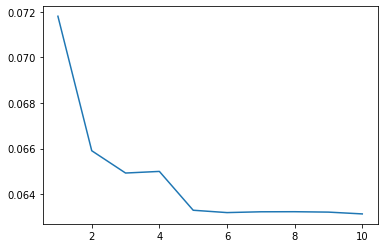

In [107]:
plt.plot(stats.groupby('epoch').mean().val_loss)

[0.07072051 0.06566413 0.06450488 0.06443446 0.06338683 0.06346512
 0.06344881 0.06336209 0.06342465 0.06326824 0.07084108 0.06482305
 0.06424216 0.06445303 0.06288029 0.06270091 0.06274554 0.06290423
 0.06284319 0.06271018 0.07249065 0.06659969 0.06576797 0.06551503
 0.06424542 0.06408268 0.06406355 0.06414616 0.06411521 0.06414979
 0.07317038 0.06652589 0.06518129 0.06557827 0.06265055 0.06250299
 0.06263416 0.0624933  0.06245218 0.06239067]


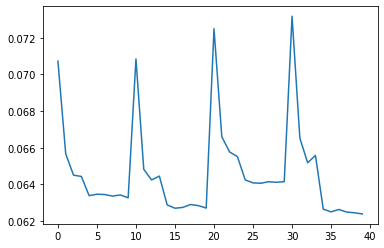

In [106]:
ver = 20
res = (pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(0,ver)).val_loss.values +
       pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(1,ver)).val_loss.values +
       pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(2,ver)).val_loss.values) / 3

# 5x1e-3, 10x2e-4, 7x2e-5, 3x5e-6
print(res)

plt.plot(res)

In [108]:
predictions.shape

(6494, 60, 6)

In [109]:
predictions.mean((0,1))

array([0.08288403, 0.00195426, 0.02747809, 0.01985382, 0.02743457,
       0.03634428], dtype=float32)

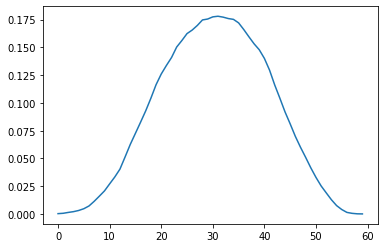

In [110]:
plt.plot(predictions.mean(0)[:,0])

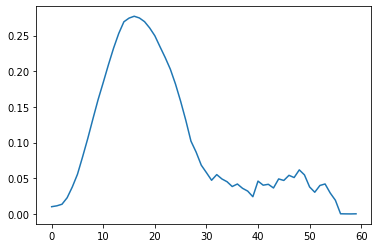

In [111]:
dd = train_md.loc[train_md.fold==2].copy()
dd['res'] = val_results[:,0]

plt.plot(dd[['res','pos_idx']].groupby('pos_idx').mean().values)